# Case study 3. Relocation service

## Scenario

You are a junior data analyst working for a business intelligence consultant. You have been at your joub for six months, and your boss feels you are ready for more responsibility. He asked you to lead a project for a brand new client - this will involve everything from defining the business task all the way through presenting your data-driven recommendations. You will choose the topic, ask the right questions, identify a fresh dataset and ensure its integrity, conduct analysis, create compelling data visualizations, and prepare a presentation.

## Ask

The client is a company that helps people with relocation to different contries. They think that they can increase their business by offering their service to people with children. And they need to make a research in order to find more comforatble contries for living with children. 
I'm going to find and explore information about health, quality of life and living costs among the different contries. I'll use Kaggle.com for getting datasets. 
The best way is to compare contries by these factors and rank them. And create some insights that can help the company to develop a strategy to attract new clients.

## Prepare

I will explore next datasets:
1. World Health Statistics 2020 (https://www.kaggle.com/datasets/utkarshxy/who-worldhealth-statistics-2020-complete)
2. City Quality of Life Dataset (https://www.kaggle.com/datasets/orhankaramancode/city-quality-of-life-dataset)
3. World Happiness Report (https://www.kaggle.com/datasets/unsdsn/world-happiness)

Let's download datasets from these sources and put it into separte folder. I'm going to use following files in csv format:
1. lifeExpectancyAtBirth.csv
2. under5MortalityRate.csv
3. incedenceOfTuberculosis.csv
4. hepatitusBsurfaceAntigen.csv
5. 30-70cancerChdEtc.csv
6. roadTrafficDeaths.csv
7. uhcCoverage.csv
8. airPollutionDeathRate.csv
9. medicalDoctors.csv
10. nursingAndMidwife.csv
11. Dentists.csv
12. Pharmacists.csv
13. safelySanitization.csv
14. uaScoresDataFrame.csv
15. 2019.csv
16. cities.csv
17. countries.csv
18. states.csv

All these datasets have the same license: CC0: Public Domain (https://creativecommons.org/publicdomain/zero/1.0/) from Kaggle.com. 
Explore data integrity:
1. World Health Statistic: data source is WHO - World Health organization, this data was filtered and cleaned.
2. City Quality of Life: data was taken from https://developers.teleport.org/.
3. World Happiness Report: the happiness scores and rankings use data from the Gallup World Poll.

We have dataset from reliable sources, but some of them was changed, filtered or cleaned. First source is cited, used in many projects and have high rating on Kaggle.

## Data prepare and cleaning

At first, I'll explore all csv files using Microsoft Excel. Steps for data cleaning:
1. Open .csv files;
2. Convert text data to columns by using "Text to Columns" tool with comma delimeter;
3. Correct auto splitting if needed;
4. Rename columns for more clear names;
5. Check columns formats (using functions NUMBERVALUE, SUBSTITUTE);
6. Split values for several columns (e.g. "60.27 [47.44-74.62]" for 3 different columns: 60.27, 47.44, 74.62 using functions LEFT, MID, RIGHT, FIND, SUBSTITUTE).

Here is example of formulas: 
 * `=MID(D2; FIND("[";D2)+1; FIND("-";D2) - FIND("[";D2)-1)`
 * `=NUMBERVALUE(SUBSTITUTE(D2; "."; ","))`

Now I'm going to use SQL to explore, join and aggregate these information. For this purpose I'll use BigQuery tool, upload datasets and write SQL scripts for cleaning data and analyzing it.
Let's upload files into BigQuery project.

Let's explore uploaded tables for allowed periods by using `DISTINCT` command, e.g.

In [ ]:
SELECT 
  DISTINCT Period
FROM 
  `fabled-emissary-394809.world_health_dataset.lifeExpectancyAtBirth`
ORDER BY Period

In [ ]:
# explore data tables 

# let's see what periods we have 
SELECT 
  DISTINCT 'lifeExpectancyAtBirth' AS TableName, Period
FROM 
  `fabled-emissary-394809.world_health_dataset.lifeExpectancyAtBirth` 

UNION ALL

SELECT 
  DISTINCT 'airPollutionDeathRate', Period
FROM 
  `fabled-emissary-394809.world_health_dataset.airPollutionDeathRate` 

UNION ALL

SELECT 
  DISTINCT 'cancerChdEtc', Period
FROM 
  `fabled-emissary-394809.world_health_dataset.cancerChdEtc` 
  
UNION ALL

SELECT 
  DISTINCT 'dentists', Period
FROM 
  `fabled-emissary-394809.world_health_dataset.dentists` 
    
UNION ALL

SELECT 
  DISTINCT 'hepatitusBsurfaceAntigen', Period
FROM 
  `fabled-emissary-394809.world_health_dataset.hepatitusBsurfaceAntigen` 
      
UNION ALL

SELECT 
  DISTINCT 'incedenceOfTuberculosis', Period
FROM 
  `fabled-emissary-394809.world_health_dataset.incedenceOfTuberculosis` 
        
UNION ALL

SELECT 
  DISTINCT 'medicalDoctors', Period
FROM 
  `fabled-emissary-394809.world_health_dataset.medicalDoctors` 
          
UNION ALL

SELECT 
  DISTINCT 'nursingAndMidwife', Period
FROM 
  `fabled-emissary-394809.world_health_dataset.nursingAndMidwife` 
            
UNION ALL

SELECT 
  DISTINCT 'pharmacists', Period
FROM 
  `fabled-emissary-394809.world_health_dataset.pharmacists` 
        
UNION ALL

SELECT 
  DISTINCT 'roadTrafficDeaths', Period
FROM 
  `fabled-emissary-394809.world_health_dataset.roadTrafficDeaths` 
          
UNION ALL

SELECT 
  DISTINCT 'safelySanitization', Period
FROM 
  `fabled-emissary-394809.world_health_dataset.safelySanitization` 
            
UNION ALL

SELECT 
  DISTINCT 'uhcCoverage', Period
FROM 
  `fabled-emissary-394809.world_health_dataset.uhcCoverage` 
      
UNION ALL

SELECT 
  DISTINCT 'under5MortalityRate', Period
FROM 
  `fabled-emissary-394809.world_health_dataset.under5MortalityRate` 
ORDER BY 1, 2

We'll get periods for all tables and we can find the least year for every table in order to make our data more current.

In [ ]:
# choose last period for every table
SELECT DISTINCT
  TableName
  , FIRST_VALUE(Period) OVER(PARTITION BY TableName ORDER BY Period DESC) AS LastYear
FROM 
  `fabled-emissary-394809.world_health_dataset.world_health_dates`

[Result in Google sheet](https://docs.google.com/spreadsheets/d/1nWv4kvF5V5CCJDbe8K5TS7faRgofPMBfZb3drRa-jlo/edit?usp=sharing)

Now we can collect data from all tables to create one dataset, that we'll use in analysis. Let's write a script that aggregate our data into one result. And then save result of the script in a table. I'll use `LEFT`, `STRPOS` function to single out the main value from column `First Tooltip` and `CAST` function to convert from `string` to `float`. Here the example:

In [ ]:
SELECT 
  Location,
  Indicator,
  Period,
  CAST(LEFT(First_Tooltip, STRPOS(First_Tooltip, '[') - 1) AS FLOAT64) AS Value
FROM 
  `fabled-emissary-394809.world_health_dataset.airPollutionDeathRate`
WHERE 
  Period = 2016 AND
  Dim2 = 'Total' AND 
  Dim1 = 'Both sexes' AND 
  Indicator = 'Ambient and household air pollution attributable death rate (per 100 000 population, age-standardized)'

We also will use the following indicators from dataset `uaScoresDataFrame.csv`:
 * Cost of Living,
 * Safety,
 * Healthcare,
 * Education,
 * Economy,
 * Taxation <br>
This dataset also contains information about citites, so we should aggregate the data into countries. We also need tables whith states and countries to aggregate United States of America into one country by using `LEFT JOIN`. Let's use `GROUP BY` for aggregation data and then CTE for using resulting dataset in order to make the same structure for all tables. We'll use `UNPIVOT` for this:

In [ ]:
WITH uaScores AS
(
  # aggregate values by countries
  SELECT 
    COALESCE(country.name, sc.UA_Country) AS Location,
    AVG(Cost_of_Living) AS Cost_of_Living_AVG,
    AVG(Safety) AS Safety_AVG,
    AVG(Healthcare) AS Healthcare_AVG,
    AVG(Education) AS Education_AVG,
    AVG(Economy) AS Economy_AVG,
    AVG(Taxation) AS Taxation_AVG
  FROM
    `fabled-emissary-394809.world_health_dataset.uaScores` sc
  LEFT JOIN
    `fabled-emissary-394809.world_health_dataset.states` st
  ON 
    TRIM(sc.UA_Country) = TRIM(st.name) AND 
    st.country_code = 'US' AND
    sc.UA_Continent = 'North America'
  LEFT JOIN
    `fabled-emissary-394809.world_health_dataset.countries` country
  ON
    country.id = st.country_id
  GROUP BY
    COALESCE(country.name, sc.UA_Country)
)

#unpivot into narrow dataset
SELECT 
  Location,
  Indicator,
  Value
FROM 
  uaScores
UNPIVOT (Value FOR Indicator IN (Cost_of_Living_AVG, Safety_AVG, Healthcare_AVG, Education_AVG, Economy_AVG, Taxation_AVG))

[Result in Google Sheet](https://docs.google.com/spreadsheets/d/1_WAsICZngSauwHTh-9INWLynYZS0xFvB_Nf0f8EGZpk/edit#gid=586126377)

Save formatting dataset into a new table `costOfLiving`. Using CTE and `UNPIVOT` also create narrow table for world happiness `2019.csv`.

[Result in Google Sheet](https://docs.google.com/spreadsheets/d/1Y6eA-8Gh1DNbORAeMdhzS9xpnH4e_JEqZevbKuZXuyY/edit#gid=437208930)

Let's summarize and save all datasets into resulting table `world_health_summary`. <br>
[Result in Google Sheet](https://docs.google.com/spreadsheets/d/1pFBYvlxg3nPTz8YPu0oyrXdK1GVUzjJiDg9tM_nfDmA/edit?usp=sharing)

Let's clean resulting dataset: correct different country naming.

In [ ]:
UPDATE 
  `fabled-emissary-394809.world_health_dataset.world_health_summary` 
SET 
  Location = 'Bolivia'
WHERE 
  Location LIKE '%Bolivia%'

UPDATE 
  `fabled-emissary-394809.world_health_dataset.world_health_summary` 
SET 
  Location = 'Congo'
WHERE 
  TRIM(Location) = 'Congo (Brazzaville)'

UPDATE 
  `fabled-emissary-394809.world_health_dataset.world_health_summary` 
SET 
  Location = 'Democratic Republic of the Congo'
WHERE 
  TRIM(Location) = 'Congo (Kinshasa)'

UPDATE 
  `fabled-emissary-394809.world_health_dataset.world_health_summary` 
SET 
  Location = 'Czechia'
WHERE 
  TRIM(Location) = 'Czech Republic'

UPDATE 
  `fabled-emissary-394809.world_health_dataset.world_health_summary` 
SET 
  Location = 'Iran'
WHERE 
  TRIM(Location) = 'Iran (Islamic Republic of)'

UPDATE 
  `fabled-emissary-394809.world_health_dataset.world_health_summary` 
SET 
  Location = "Laos"
WHERE 
  TRIM(Location) = "Lao People's Democratic Republic"

UPDATE 
  `fabled-emissary-394809.world_health_dataset.world_health_summary` 
SET 
  Location = "Russia"
WHERE 
  TRIM(Location) = "Russian Federation"

UPDATE 
  `fabled-emissary-394809.world_health_dataset.world_health_summary` 
SET 
  Location = "Syria"
WHERE 
  TRIM(Location) = "Syrian Arab Republic"

UPDATE 
  `fabled-emissary-394809.world_health_dataset.world_health_summary` 
SET 
  Location = "Trinidad and Tobago"
WHERE 
  TRIM(Location) = "Trinidad & Tobago"

UPDATE 
  `fabled-emissary-394809.world_health_dataset.world_health_summary` 
SET 
  Location = "United Kingdom"
WHERE 
  TRIM(Location) = "United Kingdom of Great Britain and Northern Ireland"

UPDATE 
  `fabled-emissary-394809.world_health_dataset.world_health_summary` 
SET 
  Location = "Tanzania"
WHERE 
  TRIM(Location) = "United Republic of Tanzania"

UPDATE 
  `fabled-emissary-394809.world_health_dataset.world_health_summary` 
SET 
  Location = "United States of America"
WHERE 
  TRIM(Location) = "United States"

UPDATE 
  `fabled-emissary-394809.world_health_dataset.world_health_summary` 
SET 
  Location = "Venezuela"
WHERE 
  TRIM(Location) = "Venezuela (Bolivarian Republic of)"

UPDATE 
  `fabled-emissary-394809.world_health_dataset.world_health_summary` 
SET 
  Location = "Vietnam"
WHERE 
  TRIM(Location) = "Viet Nam"

Finally, after cleaning we can export the summary dataset into Google Sheets and create pivot table.
Then let's use Tableau to creare charts and dashboards. Export our Google Sheet file into Microsoft Excel in order use it as a source for Tableu.
We have 3 sheets with data:
1. All summary data;
2. Pivot table;
3. Top 50 location with the most happiness score.

## Data visualization

Let's open public.tableau.com and create new viz. Add Microsoft Excel file as a data source and create a relation: data_pivot (wide pivot table) and data_top (top 50 happiest locations). Chose `LEFT JOIN` to connect tables by `Location` column, so we'll have `NULL` values if country not in TOP 50 happiest locations.

Now, check all the fields for its types: set all the numbers to decimal format, hide duplicate columns. Then create a new calculated column `TOP 50 happiness` that show if country is in the list of Top 50 most happiest contries: <br>
`IF ISNULL([Happiness TOP])
  THEN 'No'
ELSE
  'Yes'
END`
<br>
And a new column `Death rates null` that show if one of the columns indeicated mortality level is null: <br>

In [ ]:
IF ISNULL([Ambient and household air pollution attributable death rate (per 100 000 population, age-standardized)] 
 + [Estimated road traffic death rate (per 100 000 population)]
 + [Probability (%) of dying between age 30 and exact age 70 from any of cardiovascular disease, cancer, diabetes, or chronic respi]
 + [Under-five mortality rate (probability of dying by age 5 per 1000 live births)])
THEN 'Yes'
ELSE 'No'
END

Now, we can create some charts. At first, let's create Map Plot for `Happiness Score`. We'll use `Happiness Score` for color and labels to single out countries by color (from red to green), and filter for `TOP 50 happiness` - show only `Yes` for this column. Also set up number format for displaying values: left only one digit number.

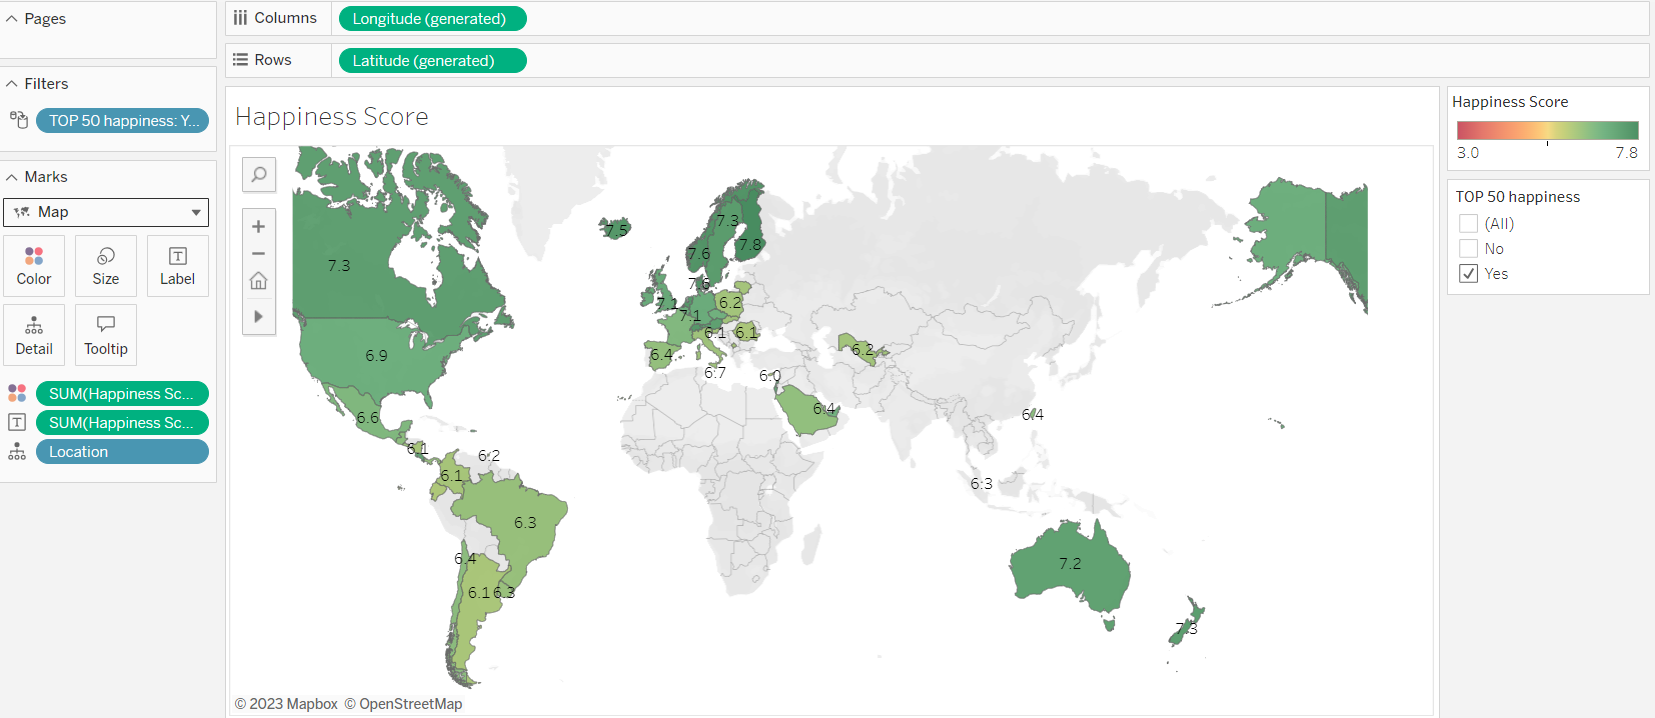

In [1]:
# display screenshot for Happiness Score map plot from Tableau
from IPython.display import Image
Image("/kaggle/input/relocation-service-pictures/Happiness Score.png")

The same way we'll create map plots for following indicators: `Cost of Living`, `Education`, `Healthcare`, `Safety`, `Social support`. Then unite these plots into dashboard:

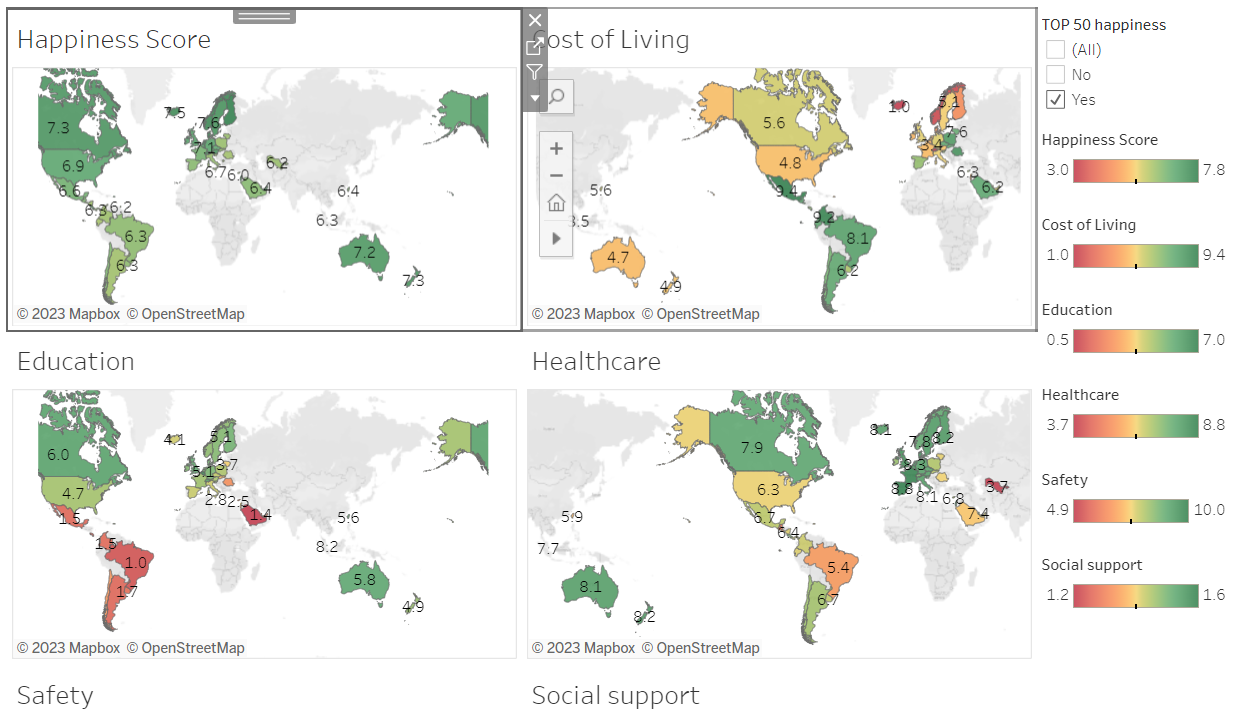

In [2]:
# display screenshot for dashboard with map plots from Tableau
from IPython.display import Image
Image("/kaggle/input/relocation-service-pictures/Map dashboard.png")

Then let's use treemaps plot for `Life expectancy`, `GDP per capita` and `UHC index`.  We'll show only countries with the highest values of indicators by filtering values from certain level. And also create tables with values for all countries in order to save the ability to see indicators for every country. 
Then we can unite treemap with its plain table into dashborads and use colors to make values more clear for users.

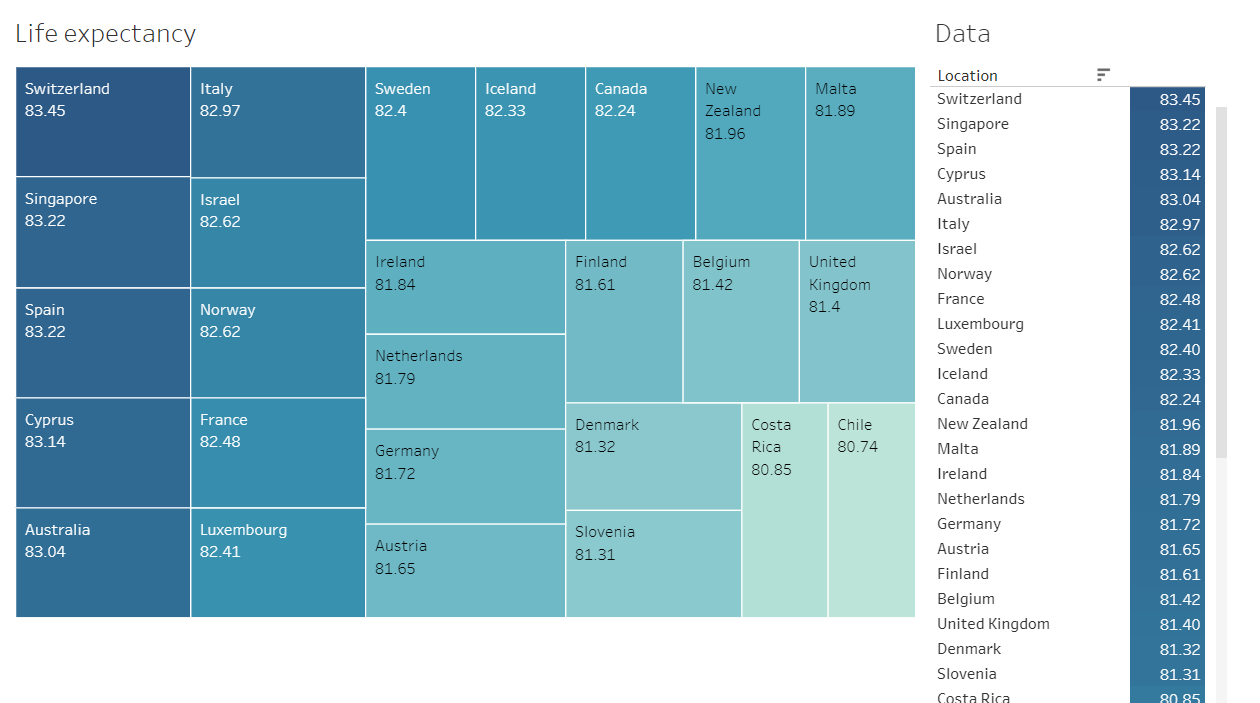

In [3]:
# display screenshot for dashboard with treemap plots from Tableau
from IPython.display import Image
Image("/kaggle/input/relocation-service-pictures/Dashboard life expectancy.png")

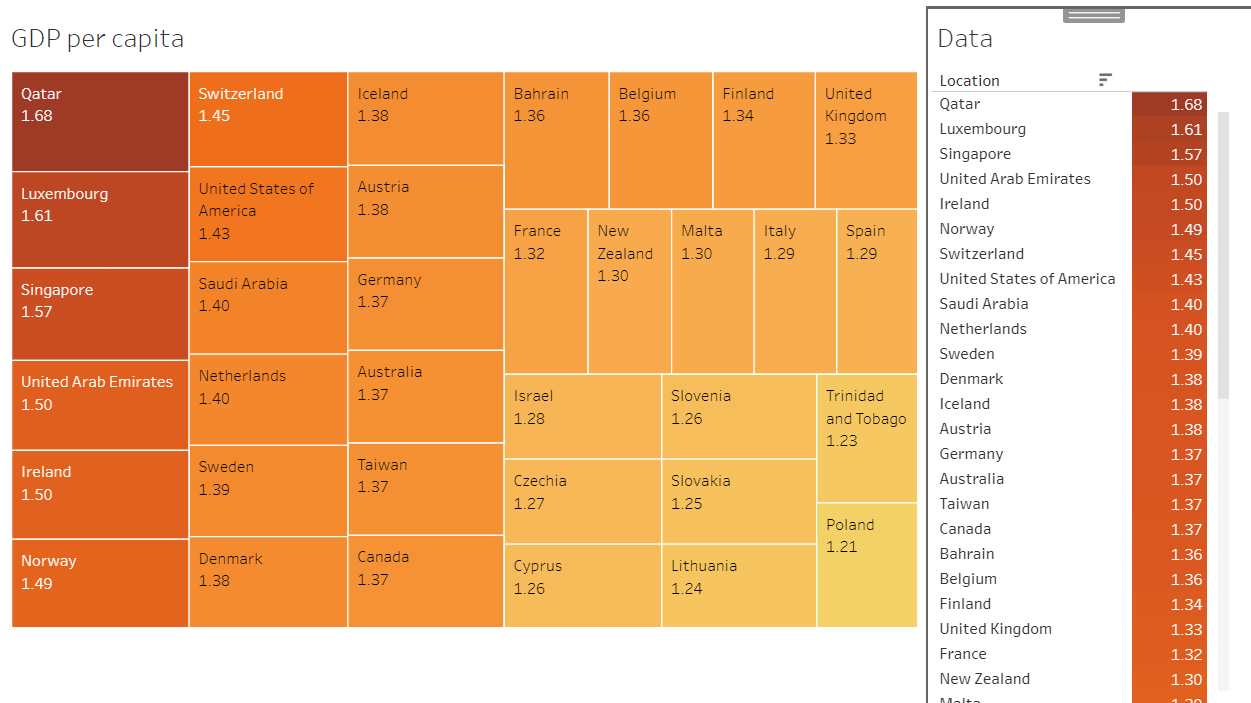

In [4]:
# display screenshot for dashboard with treemap plots from Tableau
from IPython.display import Image
Image("/kaggle/input/relocation-service-pictures/Dashboard GDP.png")

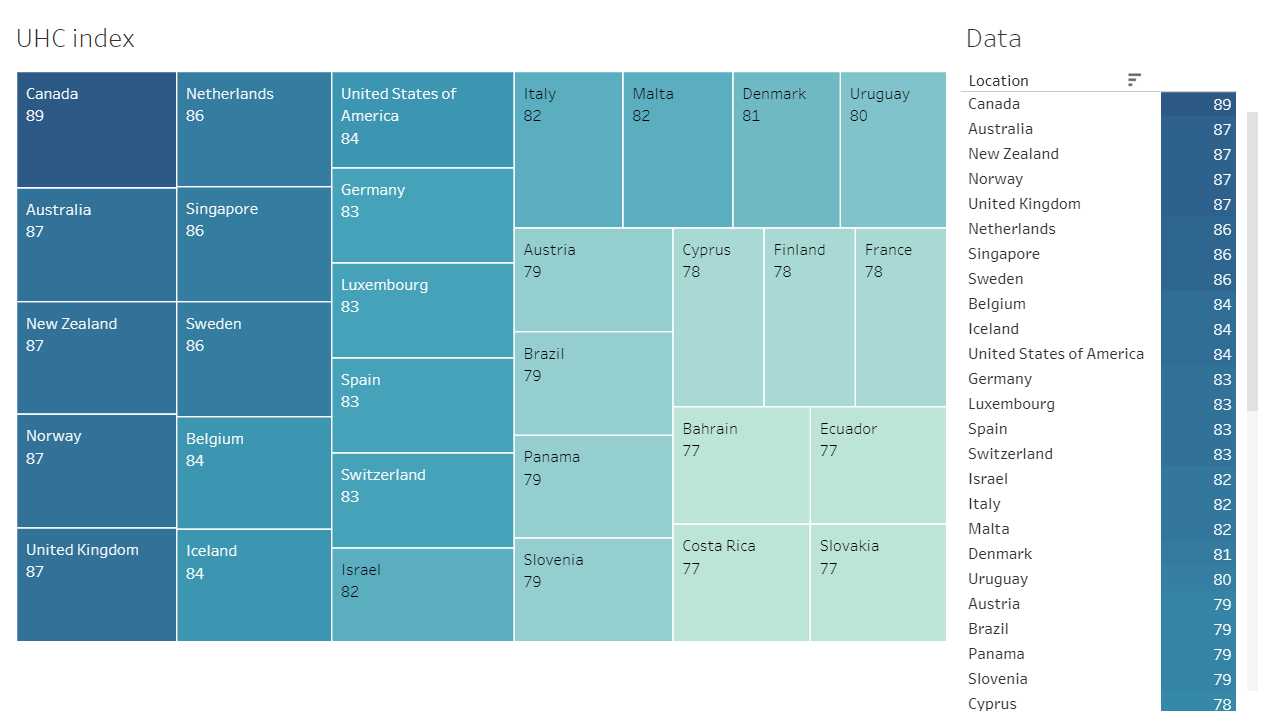

In [5]:
# display screenshot for dashboard with treemap plots from Tableau
from IPython.display import Image
Image("/kaggle/input/relocation-service-pictures/Dashboard UHC.png")

Let's create one more dashboard by using horizontal bars for the following death rates indicators: `Ambient and household air pollution attributable death rate (per 100 000 population, age-standardized)`, `Estimated road traffic death rate (per 100 000 population)`, `Probability (%) of dying between age 30 and exact age 70 from any of cardiovascular disease, cancer, diabetes, or chronic respi`, `Under-five mortality rate (probability of dying by age 5 per 1000 live births)`. 
We'll combine these bar charts into one dashboard and sort from the best values to the worst.

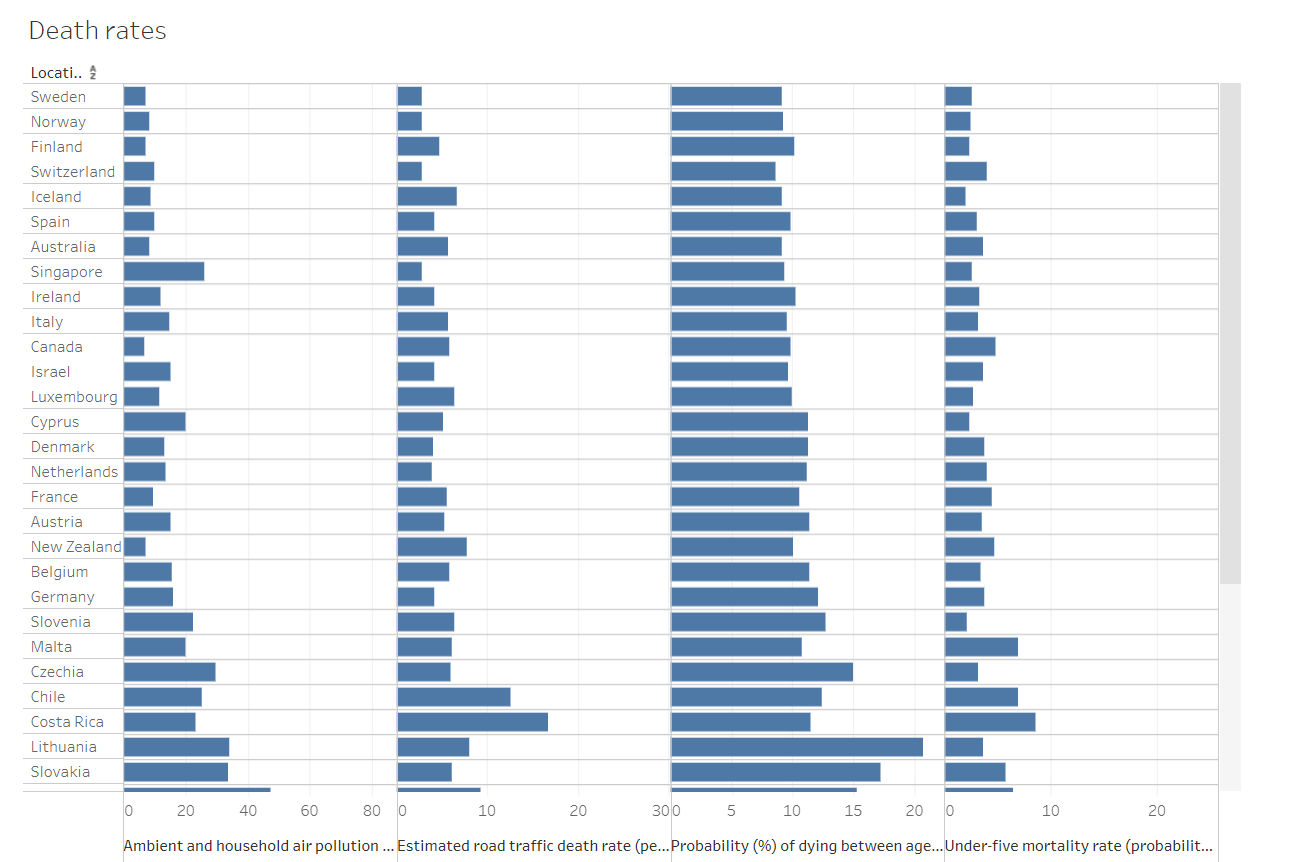

In [6]:
# display screenshot for dashboard with treemap plots from Tableau
from IPython.display import Image
Image("/kaggle/input/relocation-service-pictures/Death rates.png")

In [ ]:
# check images in kaggle directory
# import os
# rootdir = '/kaggle'
# for subdir, dirs, files in os.walk(rootdir):
#     for file in files:
#        print(os.path.join(subdir, file))

You can see the dashboards on Tableau Public: <br>
https://public.tableau.com/app/profile/aleksandr6182/viz/Relocationservice/Dashboard1

## Data analyze

Let's collect TOP 10 countries in each category into one Google Sheet file: <br>
https://docs.google.com/spreadsheets/d/1FcS03V9CWzn6R2nYn0WBbnK3RdMNhxb0WK51hSH89Og/edit?usp=sharing

Then exclude countires without an information in one of indicators. Also we won't consider parameter `Under-five mortality rate (probability of dying by age 5 per 1000 live births)`, because it has no values for several crucial countries (UK, USA). So we have 12 parameters (columns) and 40 countries. <br>
We'll use conditional formatting for every column to make our table more clearly. For the last 3 fields (death rates) we'll use reverse colors, because than the value less than better the country for living.

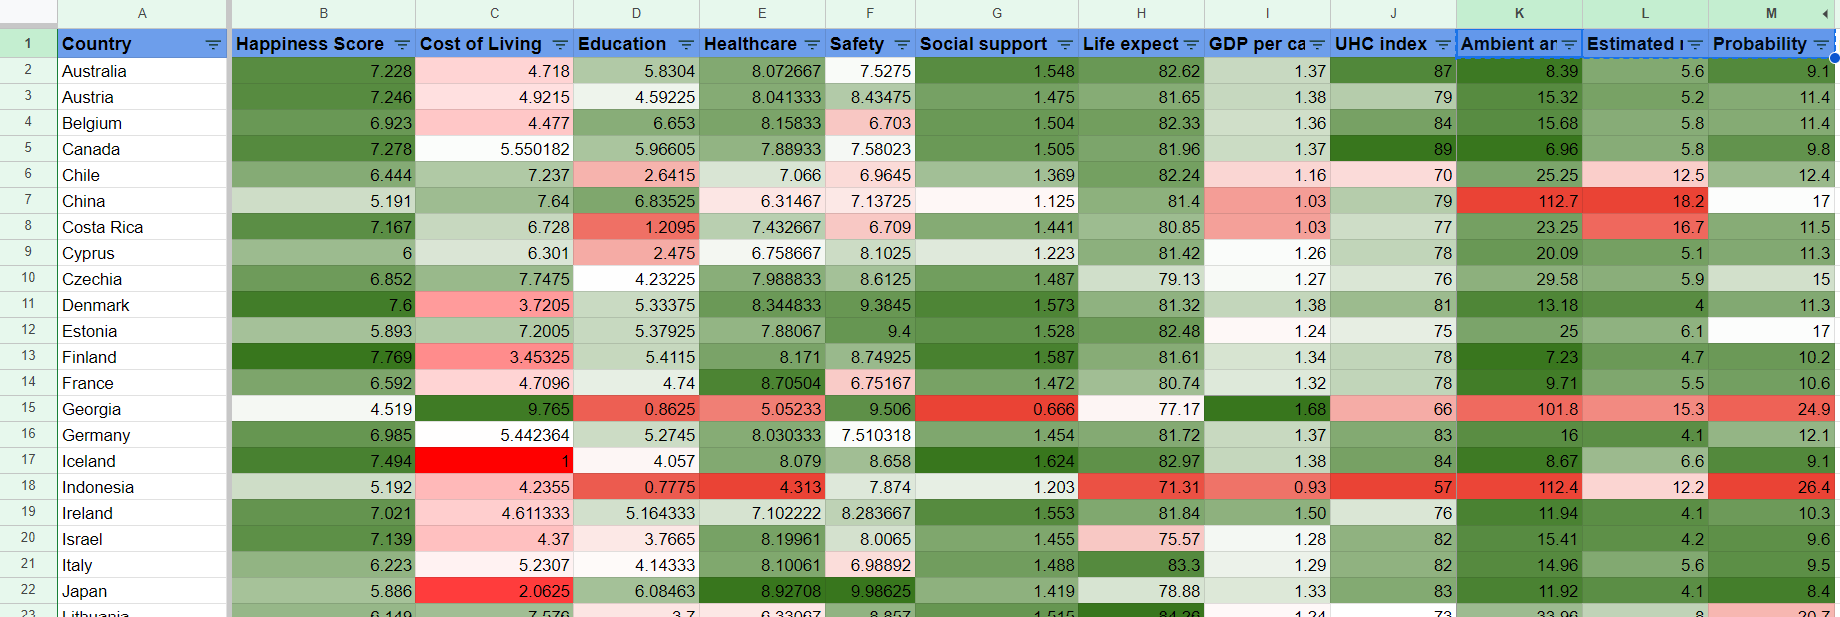

In [7]:
# display screenshot for aggregation table from Google Sheets
from IPython.display import Image
Image("/kaggle/input/relocation-service-pictures/Countries_pivot.png")

Now we'll use `RANK` function for determine the best countries in each directory. Than we can use `SUM` fnction to summarize it and get total rank for each country. A country with the least total rank will be the best place for relocation.

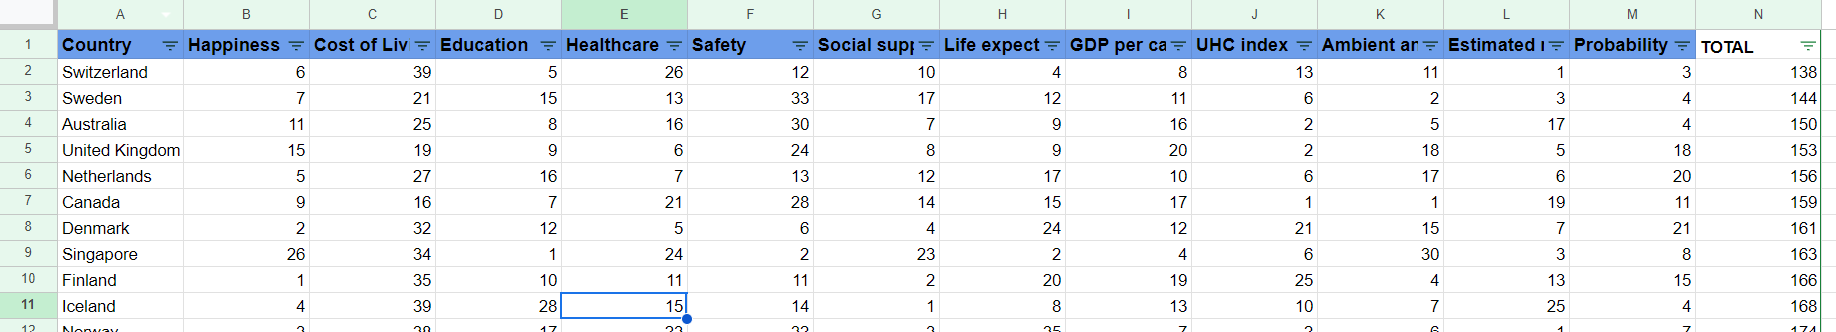

In [8]:
# display screenshot for rank table from Google Sheets
from IPython.display import Image
Image("/kaggle/input/relocation-service-pictures/Rank countires.png")

Here are Top 5 countries for relocation according our criteries:
1. Switzerland
2. Sweden
3. Australia
4. United Kingdom
5. Netherlands

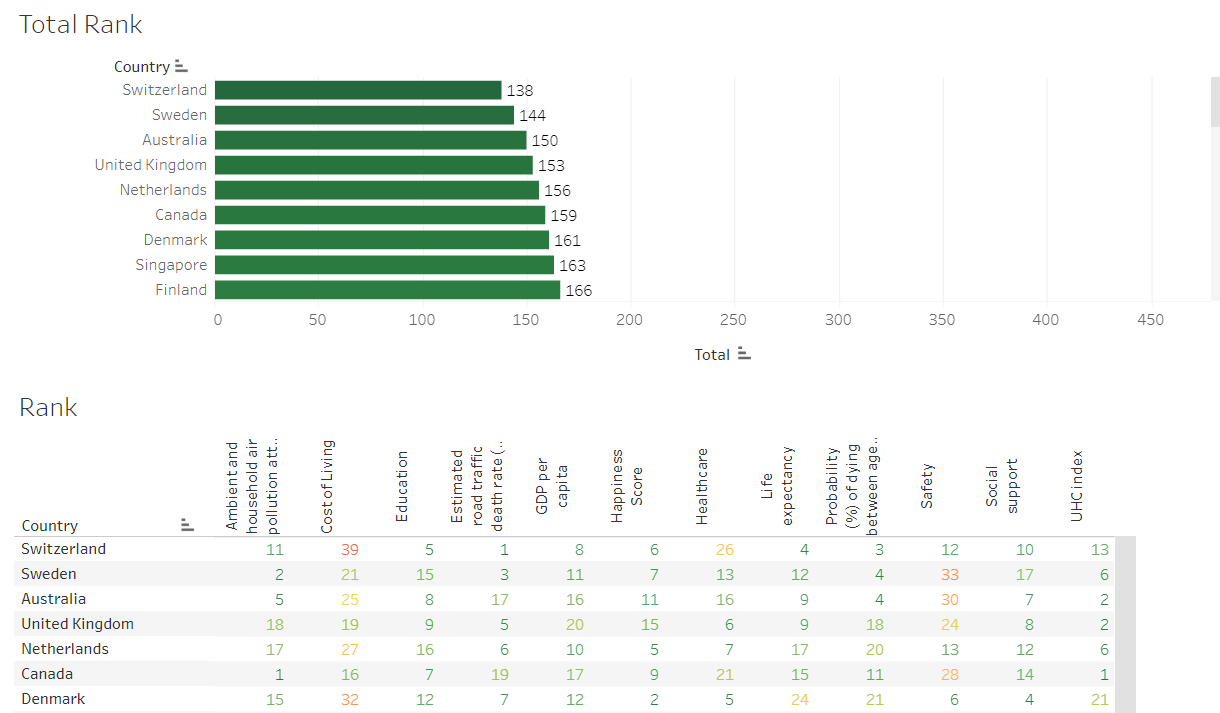

In [9]:
# display screenshot for dashboard with rank plots from Tableau
from IPython.display import Image
Image("/kaggle/input/relocation-service-pictures/Rank tableau.png")

*Switzerland* is the best country according chosen criteries. It's in top 15 countries for 10 of 12 indicators, but it's only 26s in `Healthcare` and one of the most expensive country for living. <br>
*Sweden* is also a great country with much less `Cost of Living` level, meanwhile it's in top 15 countries for 9 of 12 criteries. And it's one of the best countries by death rates indicators. <br>
*Australia* and *United Kingdom* have really high `UHC index`, `Education` level and `Social support` indicators. <br>
*Netherlands* has the highest happiness level through top 5 countries.

Finally, clients can use dashboard for exploring different indicators and different countries, they can choose their own criterias and find perfect country for them.

*I used several different tools for this task: SQL, Spreadsheets, Tableau. It's possible to complete whole analysis with only one tool or use another instruments, such as Python or R. I enjoy using different tools and studying new ones, because it's always really fascinating and interesting.*